# modeling
## use several ML techniques to build model
   0. Data Preprocessing
   1. DT  
   2. RF  
   3. Linear Regression  
   4. Logistic Regression  
   5. SVD    
   6. Gradient Boosting Regression Tree

In [1]:
import pandas as pd
import csv

## Data Preprocessing

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
from jupyterthemes import jtplot

jtplot.style(theme = 'onedork')

In [3]:
movie = pd.read_csv('movie_nonmulti_scaled.csv')


In [6]:
for i in movie :
    idx = movie[i]
    print(i)
    j = movie[idx.isnull()==True]
    print(j[i].axes[0])

movieCd
Int64Index([], dtype='int64')
showTm
Int64Index([ 415,  699,  804,  841,  886,  896,  938, 1498, 1636, 1640,
            ...
            5952, 6022, 6058, 6107, 6108, 6110, 6111, 6112, 6142, 6159],
           dtype='int64', length=165)
rating
Int64Index([   0,    2,    3,    4,    7,   12,   14,   15,   16,   18,
            ...
            6173, 6175, 6179, 6180, 6181, 6182, 6188, 6189, 6193, 6194],
           dtype='int64', length=2162)
type
Int64Index([], dtype='int64')
genre_1
Int64Index([ 178,  210,  223,  226,  243,  716,  852,  977,  993,  998, 1025,
            1064, 1081, 1106, 1107, 1338, 1445, 1460, 1498, 1543, 1636, 1640,
            1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1656, 1657,
            1661, 1683, 1691, 1697, 1700, 1706, 1749, 1770, 1871, 1879, 1924,
            2023, 2042, 2064, 2093, 2119, 2120, 2136, 2167, 2188, 2240, 2243,
            2246, 2249, 2251, 2252, 2267, 2269, 2339, 2745, 2781, 2900, 3579,
            4304, 4620, 4629, 4630, 46

In [129]:

remain_feature_list = ['showTm', 'genre_1', 'director_1', 'actor_1',
               'company_supply', 'company_making', 'grade', 'nation_1',
               'salesAcc', 'audiAcc',
               'rating']

remove_feature_list = ['movieCd', 'genre_2', 'genre_3', 'director_2', 'actor_2',
                       'actor_3', 'actor_4', 'actor_5', 'nation_2',
                       'nation_cnt', 'actor_cnt', 'director_cnt', 'genre_cnt',
                       'director', 'actor', 'genre', 'nation']

k = movie
   
for i in movie : 
    idx = movie[i]
    if (i in remain_feature_list) :
        j = movie[idx.isnull() == True]
        print(i+ " " +str(len(j)))
        for l in j[i].axes[0] :
            try :
                k = k.drop(l, axis = 0)
            except :
                continue
             

mov = k.drop(columns = [t for t in remove_feature_list], axis = 1)

showTm 163
rating 1464
director_1 460
actor_1 1194
company_supply 1536
company_making 2383
genre_1 83
grade 0
nation_1 3
salesAcc 0
audiAcc 0


In [130]:
mov['audiClass'] = 0
mov = mov.drop(columns = ['Unnamed: 0'])

def classification_by_audiences(mo):
    for i in range(len(mo)):
        if float(mo.iloc[i, 10]) < 500000:
            mo.iloc[i, 11] = 0 # '~50만'
        elif float(mo.iloc[i, 10]) < 1000000:
            mo.iloc[i, 11] = 1 # '~100만'
        elif float(mo.iloc[i, 10]) < 2000000:
            mo.iloc[i, 11] = 2 # '~200만'
        elif float(mo.iloc[i, 10]) < 5000000:
            mo.iloc[i, 11] = 3 # '~500만'
        elif float(mo.iloc[i, 10]) < 10000000:
            mo.iloc[i, 11] = 4 # '~1000만'
        else :
            mo.iloc[i, 11] = 5 # '1000만~'
            
    return mo

mo = classification_by_audiences(mov)

In [38]:
mo.to_csv('mov.csv', index = False, encoding = 'utf-8')

In [39]:
mov = mo

In [56]:
import json

with open('movie_data_table.json', 'r') as f :
    movie_data_table = json.load(f)
movie_data_table['grade']

{'12세관람가': '0',
 '전체관람가': '1',
 '12세이상관람가': '2',
 '15세관람가': '3',
 '12세 미만인 자는 관람할 수 없는 등급': '4',
 '': '5',
 '청소년관람불가': '6',
 '18세관람가': '7',
 '연소자관람불가': '8',
 '15세이상관람가': '9',
 '연소자관람가': '10',
 '고등학생이상관람가': '11',
 '중학생이상관람가': '12',
 '국민학생관람불가': '13',
 '미성년자관람불가': '14',
 '15세 미만인 자는 관람할 수 없는 등급 ': '15',
 '모든 관람객이 관람할 수 있는 등급': '16',
 '18세 미만인 자는 관람할 수 없는 등급': '17',
 '미정': '18',
 '기타': '19'}

In [63]:
mov = mov.drop(columns = ['salesAcc', 'audiAcc'])

In [99]:
from sklearn.model_selection import train_test_split

X = mov[mov.columns[0:9]]
y = mov[mov.columns[9]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
X.columns

Index(['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'],
      dtype='object')

In [82]:
mov[mov['audiClass'] == 0].count()

showTm            442
rating            442
director_1        442
actor_1           442
company_supply    442
company_making    442
genre_1           442
grade             442
nation_1          442
audiClass         442
dtype: int64

showTm            647
rating            647
director_1        647
actor_1           647
company_supply    647
company_making    647
genre_1           647
grade             647
nation_1          647
audiClass         647
dtype: int64

## Decision Tree

In [125]:
## 1. DT
# Decision Tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

movie_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
movie_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [24]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

NameError: name 'sc' is not defined

In [122]:
Xts = pd.DataFrame(sc.transform(X_train), columns=['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'])

In [119]:
X_train

,showTm,rating,director_1,actor_1,company_supply,company_making,genre_1,grade,nation_1
1992,63.0,8.00,-0.229162,-0.422440,-0.160430,-0.351940,-0.479103,-0.446440,1.320417
330,112.0,7.37,0.661126,0.180365,1.939161,1.877201,-0.009880,-0.664541,1.320417
1864,126.0,8.03,2.884735,1.041972,13.607305,1.052332,0.797205,0.838578,1.320417
1773,91.0,3.37,-0.239158,-0.062691,-0.163364,-0.369266,-0.775019,-0.664541,1.320417
2349,102.0,5.17,-0.240369,-0.428480,-0.040057,-0.270211,-0.355175,-0.664541,1.320417
1797,85.0,6.41,-0.237994,-0.426150,0.004654,-0.368683,-0.161240,-0.664541,1.320417
3444,69.0,0.00,-0.240292,-0.428458,-0.165401,-0.370098,-0.775019,-0.664541,1.320417
3240,119.0,6.63,3.659803,0.874142,8.250308,0.269502,1.822388,1.481334,1.320417
2605,71.0,2.59,-0.240316,-0.428440,-0.165336,-0.369957,-0.009880,-0.664541,1.320417
1345,122.0,7.63,0.581256,0.080794,6.469050,0.277059,1.153869,0.838578,2.056954


In [126]:
from sklearn.metrics import accuracy_score

y_pred_tr = movie_tree.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.77


In [93]:
# from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_tr, labels=[0, 1, 2, 3, 4, 5])

array([[84,  2,  1,  2,  0,  0],
       [ 5,  5,  1,  0,  0,  0],
       [ 2,  1,  0,  3,  1,  0],
       [ 1,  2,  3, 11,  2,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0]])

In [71]:
movie_feature_names = np.array(['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'])

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(movie_tree, out_file="tree.dot",
                class_names=["~50만", "~100만", "~200만", "~500만", "~1000만", "1000만~"],
                feature_names = movie_feature_names,
                impurity = False, filled = True)

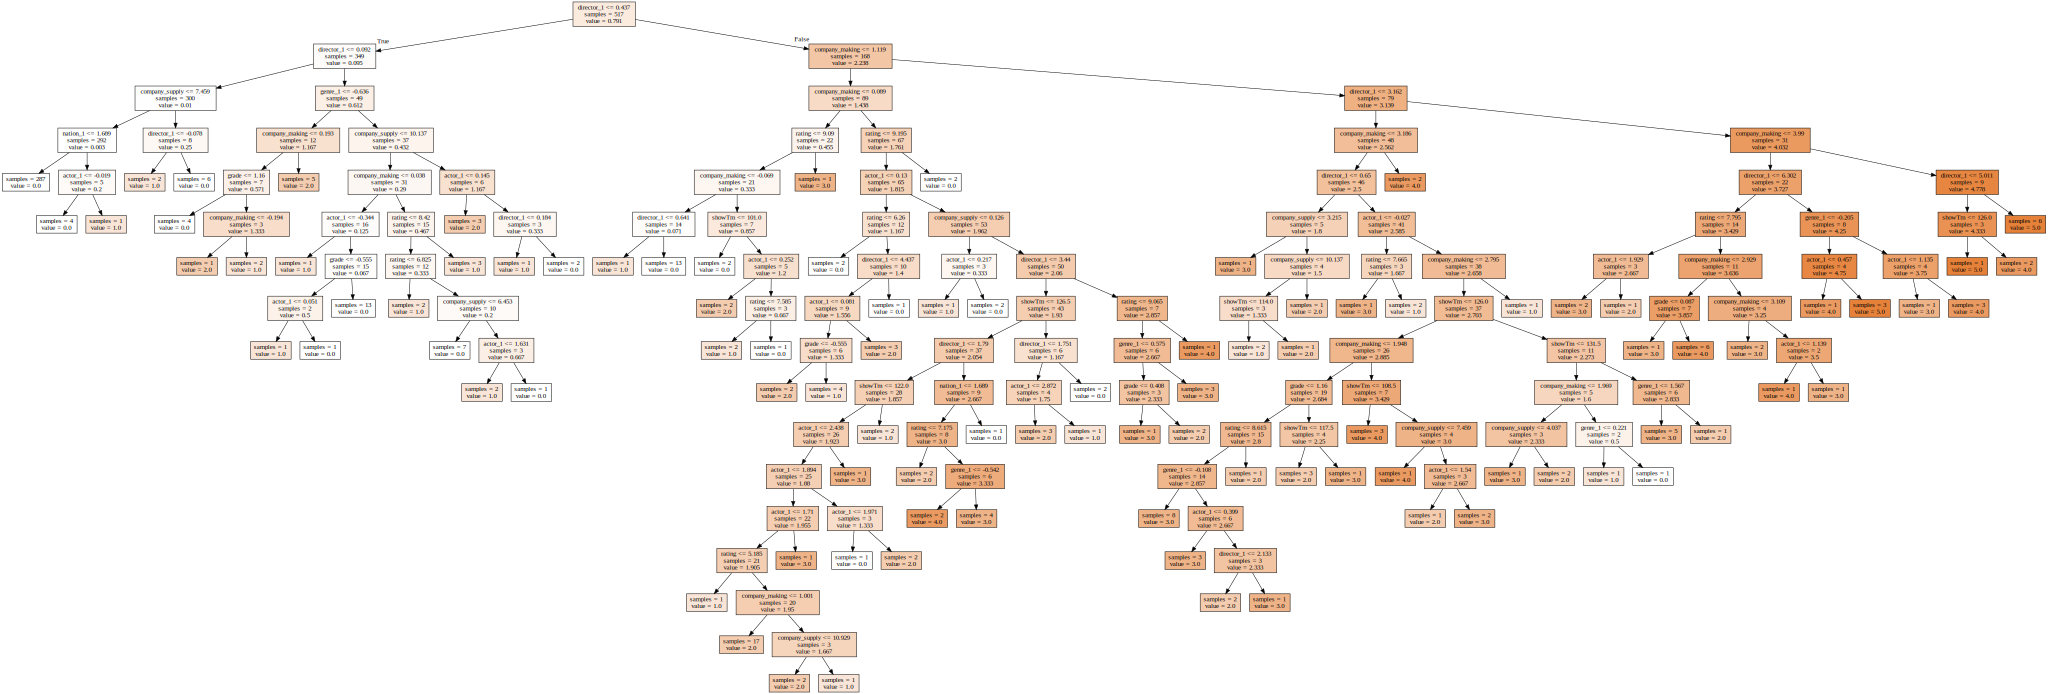

In [73]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [96]:
print("특성:", movie_feature_names)
print("특성 중요도:\n{}".format(movie_tree.feature_importances_))

특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply'
 'company_making' 'genre_1' 'grade' 'nation_1']
특성 중요도:
[0.02039191 0.03284207 0.66390327 0.03337317 0.020348   0.20045452
 0.01165465 0.00801962 0.00901278]


## Random Forest

In [75]:
## 2. RF
# Random Forest

from sklearn.ensemble import RandomForestClassifier

movie_rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=123456)
movie_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [ ]:
## change variables...

def plot_feature_importances_movie(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_movie(tree)

In [76]:
predicted = movie_rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {movie_rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.764
Mean accuracy score: 0.777


In [95]:
print("특성:", movie_feature_names)
print("특성 중요도:\n{}".format(movie_rf.feature_importances_))

특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply'
 'company_making' 'genre_1' 'grade' 'nation_1']


NameError: name 'movie_rf' is not defined

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted, labels=[0, 1, 2, 3, 4, 5])

array([[87,  1,  1,  0,  0,  0],
       [ 7,  1,  3,  0,  0,  0],
       [ 1,  0,  3,  2,  1,  0],
       [ 1,  1,  5, 10,  2,  0],
       [ 1,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0,  0]])

## Linear Regression

Coefficients: 
 [50989.12830535]
Mean squared error: 2377102917859.39
Variance score: 0.29


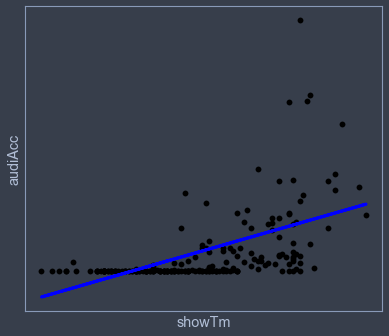

Coefficients: 
 [350849.38226078]
Mean squared error: 2886266201948.97
Variance score: 0.13


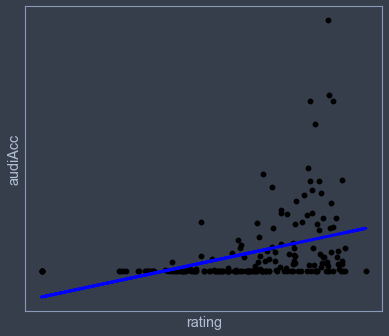

Coefficients: 
 [953925.99913622]
Mean squared error: 874880245062.03
Variance score: 0.74


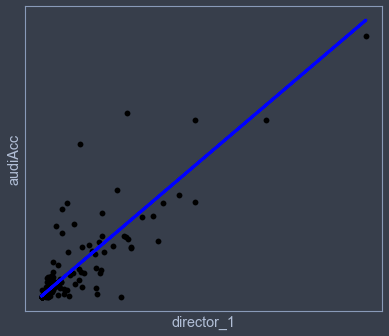

Coefficients: 
 [1344678.75190662]
Mean squared error: 2635815140780.24
Variance score: 0.21


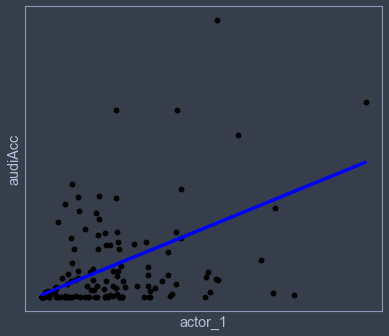

Coefficients: 
 [237707.19470366]
Mean squared error: 2633297163249.81
Variance score: 0.21


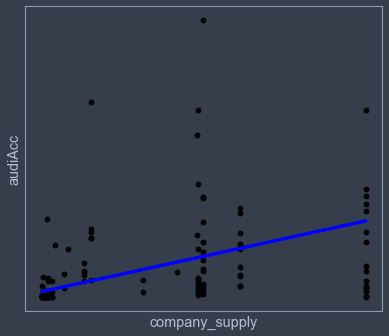

Coefficients: 
 [1613777.10714302]
Mean squared error: 1297777447884.96
Variance score: 0.61


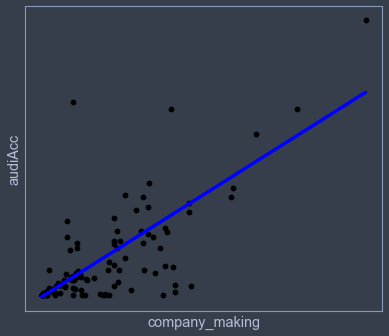

Coefficients: 
 [1344205.68840002]
Mean squared error: 3088404770535.79
Variance score: 0.07


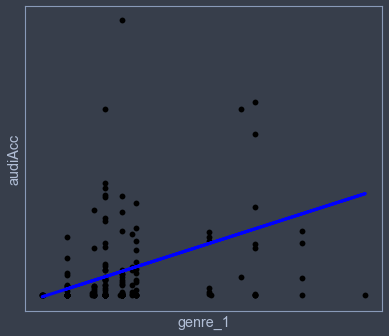

Coefficients: 
 [958985.75184271]
Mean squared error: 3027725128614.04
Variance score: 0.09


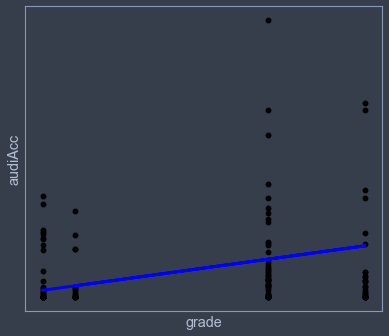

Coefficients: 
 [383576.60854456]
Mean squared error: 3301998365983.74
Variance score: 0.01


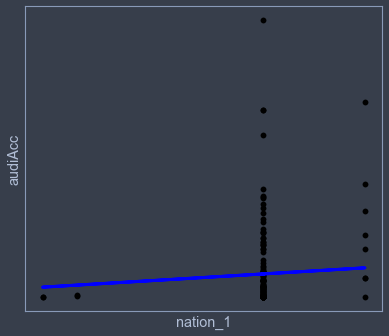

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def movie_linear_regression(mov) :
    for feature in mov.columns[:-3] :
        X = mov[[feature]]
        y = mov['audiAcc']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        movie_lin_regr = LinearRegression()

        movie_lin_regr.fit(X_train, y_train)
        
        y_pred = movie_lin_regr.predict(X_test)
        
        print('Coefficients: \n', movie_lin_regr.coef_)
        print("Mean squared error: %.2f"
              % mean_squared_error(y_test, y_pred))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % r2_score(y_test, y_pred))

        # Plot outputs
        plt.scatter(X_test, y_test,  color='black')
        plt.plot(X_test, y_pred, color='blue', linewidth=3)
        plt.xlabel(feature)
        plt.ylabel('audiAcc')
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
movie_linear_regression(mov)

In [132]:
mov

,showTm,rating,director_1,actor_1,company_supply,company_making,genre_1,grade,nation_1,salesAcc,audiAcc,audiClass
190,89.0,8.23,-0.239693,-0.425046,-0.163364,-0.369782,-0.355175,-0.446440,0.630973,4.930000e+06,919.0,0
194,115.0,9.11,-0.059441,-0.421231,-0.115625,-0.290895,2.528785,-0.446440,2.056954,9.216970e+07,11368.0,0
210,107.0,9.24,-0.059441,-0.421231,-0.115625,-0.290895,2.528785,-0.446440,2.056954,1.169257e+08,13700.0,0
231,126.0,7.48,0.419335,-0.343386,4.194309,-0.220698,2.528785,-0.446440,2.056954,5.222450e+08,42976.0,0
232,129.0,8.93,1.010630,-0.424967,-0.065140,-0.362547,-0.355175,-0.664541,2.056954,7.034410e+07,9060.0,0
249,90.0,6.38,-0.239833,-0.410649,-0.163931,-0.297402,1.153869,0.838578,0.630973,3.840000e+06,4950.0,0
259,104.0,8.45,-0.240361,0.458789,0.119598,-0.370140,-0.161240,-0.664541,1.320417,6.205000e+05,82.0,0
260,74.0,8.76,-0.239998,-0.428388,-0.163612,-0.369917,-0.186674,1.481334,1.320417,2.961500e+06,446.0,0
267,102.0,9.33,-0.198632,-0.322890,1.109673,0.193035,-0.355175,0.838578,2.056954,9.877340e+07,11548.0,0
274,112.0,8.59,-0.013400,1.756699,0.119598,0.586108,1.310998,1.481334,1.320417,1.943500e+06,270.0,0


In [146]:
X = df
y = mov['audiAcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [147]:
movie_lin_regr = LinearRegression()

movie_lin_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
y_pred = movie_lin_regr.predict(X_test)

Coefficients: 
 [49544.67712799]
Mean squared error: 4888129028361.14
Variance score: 0.22


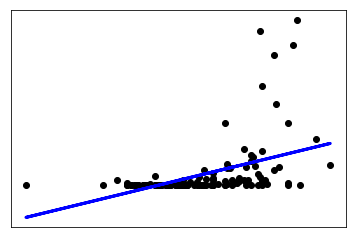

In [149]:
print('Coefficients: \n', movie_lin_regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [150]:
movie_lin_regr.score(X,y)

0.2386917755594803

## Logistic Regression

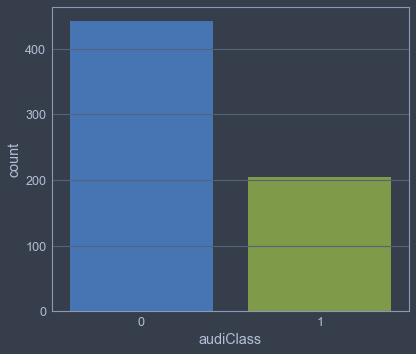

accuracy is :  0.8666666666666667


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [194]:
from sklearn.linear_model import LogisticRegression

def movie_logistic_regression(mov):
    X = mov[mov.columns[0:9]] # mov.iloc[:,0:9]
    y = mov['audiClass']
    
    sns.countplot(x='audiClass', data=mov)
    plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    movie_log_regr = LogisticRegression()
    movie_log_regr.fit(X_train, y_train)
    print("accuracy is : ",movie_log_regr.score(X_test, y_test))
    
movie_logistic_regression(mov)

## Support Vector Machine

In [212]:
from sklearn.svm import SVC
from sklearn import preprocessing

In [238]:
def movie_support_vector_machine(mov):
    movie_svm = SVC(kernel='rbf', C=1000, random_state=42, gamma=1.0)
    X = mov.iloc[:,0:9]
    y = mov.iloc[:,10]
    X = preprocessing.minmax_scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    movie_svm.fit(X_train, y_train)
    
    # print('Accuracy: %.3f' % movie_svm.score(X_test, y_test))
    print('Accuracy: {:.3f}'.format(movie_svm.score(X_test, y_test)))
movie_support_vector_machine(mov)

Accuracy: 0.005


### Gradient Boosting Regression Tree

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

In [241]:
def movie_gradient_boosting_regression_tree(mov):
    X = mov.iloc[:, 0:9]
    y = mov.iloc[:, 10]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    movie_gbrt = GradientBoostingClassifier(random_state=0)
    movie_gbrt.fit(X_train, y_train)
    
    print("훈련 세트 정확도: {:.3f}".format(movie_gbrt.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(movie_gbrt.score(X_test, y_test)))
    
movie_gradient_boosting_regression_tree(mov)

훈련 세트 정확도: 0.996
테스트 세트 정확도: 0.010
